In [6]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
from sklearn.model_selection import train_test_split


In [15]:
response = requests.get('http://www.lawrence.edu/fast/greggj/CMSC490/diabetes.csv')
df = pd.read_csv(StringIO(response.text))
df.head()
len(df)

520

In [8]:
df['gender'] = df['gender'].replace({'Male': 0,'Female': 1})
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [9]:
mean_age = df['age'].mean()
std_age = df['age'].std()
df['age'] = (df['age'] - mean_age) / std_age
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,-0.660731,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.820572,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578436,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249258,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.985161,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [10]:
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model for Bench Marking

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.08970271297753933
R-squared (R2) Score: 0.5859050176845646


The squared difference between the actual and predicted values in my regression model(MSE) is approximately 0.09.
I'm going to try and build a Neural Networks model that does better or at least performs in a similar level.

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [44]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

There are total of 520 rows in this data frame. 80% of the 520 rows was used as the training set. Among those (520 * 0.8 =) 416 rows, I will use 20% as the validation set.

In [45]:
x_val = X_train[:83]
partial_x_train = X_train[83:]
y_val = y_train[:83]
partial_y_train = y_train[83:]

In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=16,
                    validation_data=(x_val, y_val))

Epoch 1/20
21/21 [==============================] - 1s 4ms/step - loss: 0.6077 - accuracy: 0.6276 - val_loss: 0.5510 - val_accuracy: 0.6386
Epoch 2/20
21/21 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.7568 - val_loss: 0.4765 - val_accuracy: 0.8193
Epoch 3/20
21/21 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8739 - val_loss: 0.4078 - val_accuracy: 0.8554
Epoch 4/20
21/21 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.9129 - val_loss: 0.3504 - val_accuracy: 0.9036
Epoch 5/20
21/21 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.9279 - val_loss: 0.3042 - val_accuracy: 0.9157
Epoch 6/20
21/21 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 0.9339 - val_loss: 0.2646 - val_accuracy: 0.9157
Epoch 7/20
21/21 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9339 - val_loss: 0.2369 - val_accuracy: 0.8795
Epoch 8/20
21/21 [==

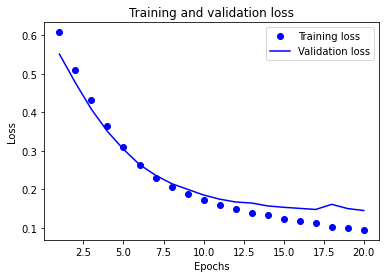

In [47]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

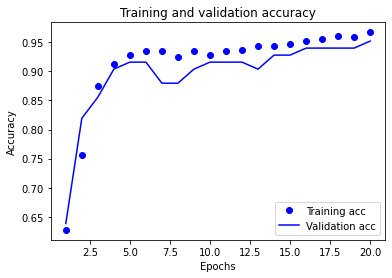

In [48]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()